In [ ]:
!pip install tensorflow-addons==0.16.1
!pip install pydot
!pip install graphviz


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from tensorflow_addons.metrics import RSquare
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.utils import plot_model
from tensorflow.keras import backend as K
import os

In [ ]:
# # To import data file

# from google.colab import files
# import zipfile
# import io

# uploaded = files.upload()

# uploaded_filename = "prop.zip"
# with zipfile.ZipFile(uploaded_filename, 'r') as zip_ref:
#     zip_ref.extractall(".")


In [ ]:
folder_path = "."                     # Opens current directory.
contents = os.listdir(folder_path)    # Gives list of folder in the directory
print(contents)

['.config', 'prop.zip', 'model.png', 'model1.keras', 'prop', 'sample_data']


In [ ]:
# Define a function to extract data
def read_data(filename):

    data = []
    with open(filename, 'r') as f:
        for line in f:

            # Split the line by spaces and convert each value to float
            line_data = [float(value) for value in line.strip().split()]
            data.append(line_data)
    return data

In [ ]:
# Displacement data set
# Input data
diplacement_list=[]
for i in range(0,1000):
    file_path = os.path.join(folder_path, "prop", f'displacement ({i})')               # Calling file displacement data
    data=read_data(file_path)



    diplacement_list.append(data)

displacement_array = np.array(diplacement_list)
#displacement_array=displacement.reshape(1000,1681)
print(displacement_array.shape)

(1000, 1681, 1)


In [ ]:
# Property data set
# Labels

prop_list=[]

for i in range(0,1000):
    file_path = os.path.join(folder_path, "prop", f'prop.dat ({i})')               # Calling file prop.dat data
    data=read_data(file_path)



    prop_list.append(data[1:401])

prop_array=np.array(prop_list)
#prop_array=prop.reshape(1000,400)

print(prop_array.shape)

(1000, 400, 1)


In [ ]:
# Min-Max Scaling
def min_max_scaling(data):
   scaled_data=np.zeros((len(data[:,0,0]),len(data[0,:,0]),1))
   for i in range(0,len(data[:,0,0])):
       min_val = np.min(data[i,:,:])
       max_val = np.max(data[i,:,:])
       for j in range(0,len(data[0,:,0])):

           scaled_data[i,j,:] = (data[i,j,:] - min_val) / (max_val - min_val)
   return scaled_data

In [ ]:
# Normalize input data
x_scaled = min_max_scaling(displacement_array)


# Normalize output data
y_scaled = min_max_scaling(prop_array)


In [ ]:
#splitting the dataset to training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x_scaled ,y_scaled, test_size=0.2,shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1681, 1), (200, 1681, 1), (800, 400, 1), (200, 400, 1))

In [ ]:
# building the ANN model using tensorflow
model = Sequential()
model.add(Dense(8, activation = "relu", input_dim=1681,name='hidden_1'))
model.add(Dense(128, activation = "relu",name='hidden_2'))
model.add(Dense(256, activation = "relu"))
model.add(Dense(512, activation = "relu"))
model.add(Dense(1024, activation = "relu"))
model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(400,activation = "sigmoid",name='output'))

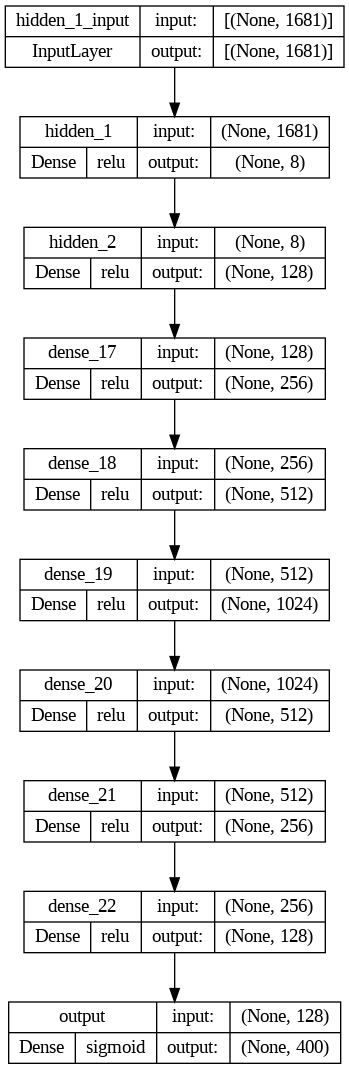

In [ ]:
#visulize model
plot_model(model, show_shapes=True, show_layer_names=True,show_layer_activations=True)

In [ ]:
#weights and bias values
print("Weights and biases of the layers before training the model: \n")
for layer in model.layers:
     layer.name
     layer.get_weights()[0]
     layer.get_weights()[1]


Weights and biases of the layers before training the model: 



In [ ]:
# compile and train model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy')
history = model.fit(X_train,y_train , validation_data=( X_test, y_test ), epochs=300,batch_size= 40)



Epoch 1/300
20/20 [==============================] - 2s 35ms/step - loss: 0.6889 - val_loss: 0.6755
Epoch 2/300
20/20 [==============================] - 0s 24ms/step - loss: 0.6326 - val_loss: 0.5739
Epoch 3/300
20/20 [==============================] - 1s 26ms/step - loss: 0.5400 - val_loss: 0.4813
Epoch 4/300
20/20 [==============================] - 0s 24ms/step - loss: 0.4613 - val_loss: 0.4108
Epoch 5/300
20/20 [==============================] - 0s 25ms/step - loss: 0.4061 - val_loss: 0.3676
Epoch 6/300
20/20 [==============================] - 1s 28ms/step - loss: 0.3735 - val_loss: 0.3453
Epoch 7/300
20/20 [==============================] - 0s 23ms/step - loss: 0.3569 - val_loss: 0.3337
Epoch 8/300
20/20 [==============================] - 1s 26ms/step - loss: 0.3484 - val_loss: 0.3285
Epoch 9/300
20/20 [==============================] - 0s 23ms/step - loss: 0.3436 - val_loss: 0.3267
Epoch 10/300
20/20 [==============================] - 0s 24ms/step - loss: 0.3407 - val_loss: 0.3251

In [ ]:
model.save('model5.keras')

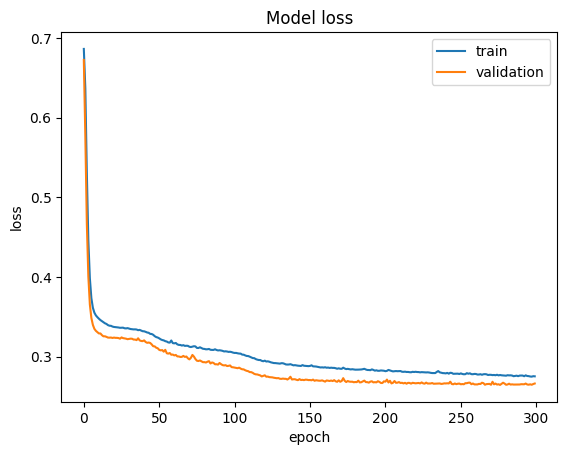

In [ ]:
#plotting training history of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()